In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt 
import copy
from PIL import Image

In [2]:
actions = ["up","down","left","right"]

In [3]:
def reward(x,y):
  if x == 48 and y == 12:
    return 100
  return 0
def isWall(x,y):
  
  if x>=0 and x<=49 and y==0:
    return True
  if x>=0 and x<=49 and y==24:
    return True
  if y>=0 and y<=24 and x==0:
    return True
  if y>=0 and y<=24 and x==49:
    return True
  if y>=13 and y<=24 and x==25:
    return True
  if y>=13 and y<=24 and x==26:
    return True
  if y>=0 and y<=11 and x==25:
    return True
  if y>=0 and y<=11 and x==26:
    return True
  return False

In [4]:
def epsilon_greedy(epsilon,Q,i,j):
  max1=-1e6
  optimal_action=-1
  for a in range(4):
    max1 = max(Q[i][j][a],max1)
    if(max1==Q[i][j][a]):
      optimal_action=a
  r = np.random.choice([optimal_action,-1], p=[1-epsilon,epsilon])
  if r==-1:
    r = np.random.choice([0,1,2,3], p=[0.25,0.25,0.25,0.25])
  return r,max1
def start_state():
  x=None
  y=None
  while(True):
    x = random.randint(1,48)
    y = random.randint(1,23)
    if(isWall(x,y) == False):
      if((x==48 and y==12)==False):
        break
  return x,y 


In [5]:
def move(x, y, dir):
  xf = x
  yf = y
  if dir == 0:
    yf = y+1
  elif dir == 1:
    yf = y-1
  elif dir == 2:
    xf = x-1
  else:
    xf = x+1
  if (isWall(xf, yf)):
    return x, y
  else: 
    return xf, yf
def sample(x, y, dir):
# actions = ["up","down","left","right"]
  r = None
  if (dir == 0):
    r = np.random.choice(np.arange(0, 4), p=[0.8, 0.2/3, 0.2/3, 0.2/3])
  elif (dir == 1):
    r = np.random.choice(np.arange(0, 4), p=[0.2/3, 0.8, 0.2/3, 0.2/3])
  elif (dir == 2):
    r = np.random.choice(np.arange(0, 4), p=[0.2/3, 0.2/3, 0.8, 0.2/3])
  else:
    r = np.random.choice(np.arange(0, 4), p=[0.2/3, 0.2/3, 0.2/3, 0.8])
  return move(x, y, r)

In [6]:
states = []
for i in range(50):
  for j in range(25):
    if isWall(i,j):
      continue
    if i==48 and j==24:
      continue
    states.append((i,j))
print(len(states))

1060


In [7]:
def q_learning(alpha,epsilon,episodes,steps,gamma,states):
  Q = np.zeros((50,25,4))
  x = 0
  y = 0
  g = []
  for episode in range(episodes):
    g1 = 0
    # x,y = start_state()
    x,y = states[episode%len(states)]
    if episode>0 and episode%len(states)==0:
      alpha = alpha-0.08
    for step in range(steps):
      action = epsilon_greedy(epsilon,Q,x,y)[0]
      xf,yf = sample(x,y,action)
      if xf == x and y == yf:
        Q[x][y][action] = Q[x][y][action] + alpha*(-1+gamma*epsilon_greedy(epsilon,Q,xf,yf)[1]-Q[x][y][action])
        g1 = gamma*g1 -1
      else:
        Q[x][y][action] = Q[x][y][action] + alpha*(reward(xf,yf)+gamma*epsilon_greedy(epsilon,Q,xf,yf)[1]-Q[x][y][action])
        g1 = gamma*g1 + reward(xf,yf)
      x = xf
      y = yf
      if(x==48 and y==12):
        break
    g.append(g1)     
  return Q,g

In [8]:
def value_policy(Q):
  Pi = np.zeros((50,25))-1
  V = np.zeros((50,25))
  for i in range(50):
    for j in range(25):
      if isWall(i,j):
        continue
      if i==48 and j==12:
        continue
      max1=-1e6
      optimal_action=-1
      for a in range(4):
        max1 = max(Q[i][j][a],max1)
        if(max1==Q[i][j][a]):
          optimal_action=a
      Pi[i][j] = optimal_action
      V[i][j] = max1
  return V,Pi

In [9]:
def plot_policy(Pi):
  x = []
  y = []
  x_direct = []
  y_direct = []
  for i in range(0,50):
    for j in range(0,25):
      if isWall(i,j):
        continue
      if i==48 and j==12:
        continue
      x.append(i+0.5)
      y.append(j+0.5)
      if Pi[i][j]==0:
        x_direct.append(0)
        y_direct.append(1)
      if Pi[i][j]==1:
        x_direct.append(0)
        y_direct.append(-1)
      if Pi[i][j]==2:
        x_direct.append(-1)
        y_direct.append(0)
      if Pi[i][j]==3:
        x_direct.append(1)
        y_direct.append(0)
  plt.quiver(x,y,x_direct,y_direct)
  plt.rcParams["figure.figsize"] = (50,25)
  plt.xticks(np.arange(0, 51, 1))
  plt.yticks(np.arange(0, 25, 1))
  plt.xlim((0,50))
  plt.ylim((0,25))
  plt.grid()
  plt.show()


In [10]:
Q1,y1 = q_learning(0.9,0.5,10000,1000,0.99,states)

In [11]:
V1,Pi1 = value_policy(Q1)

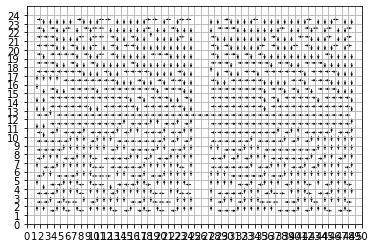

In [12]:
plot_policy(Pi1)

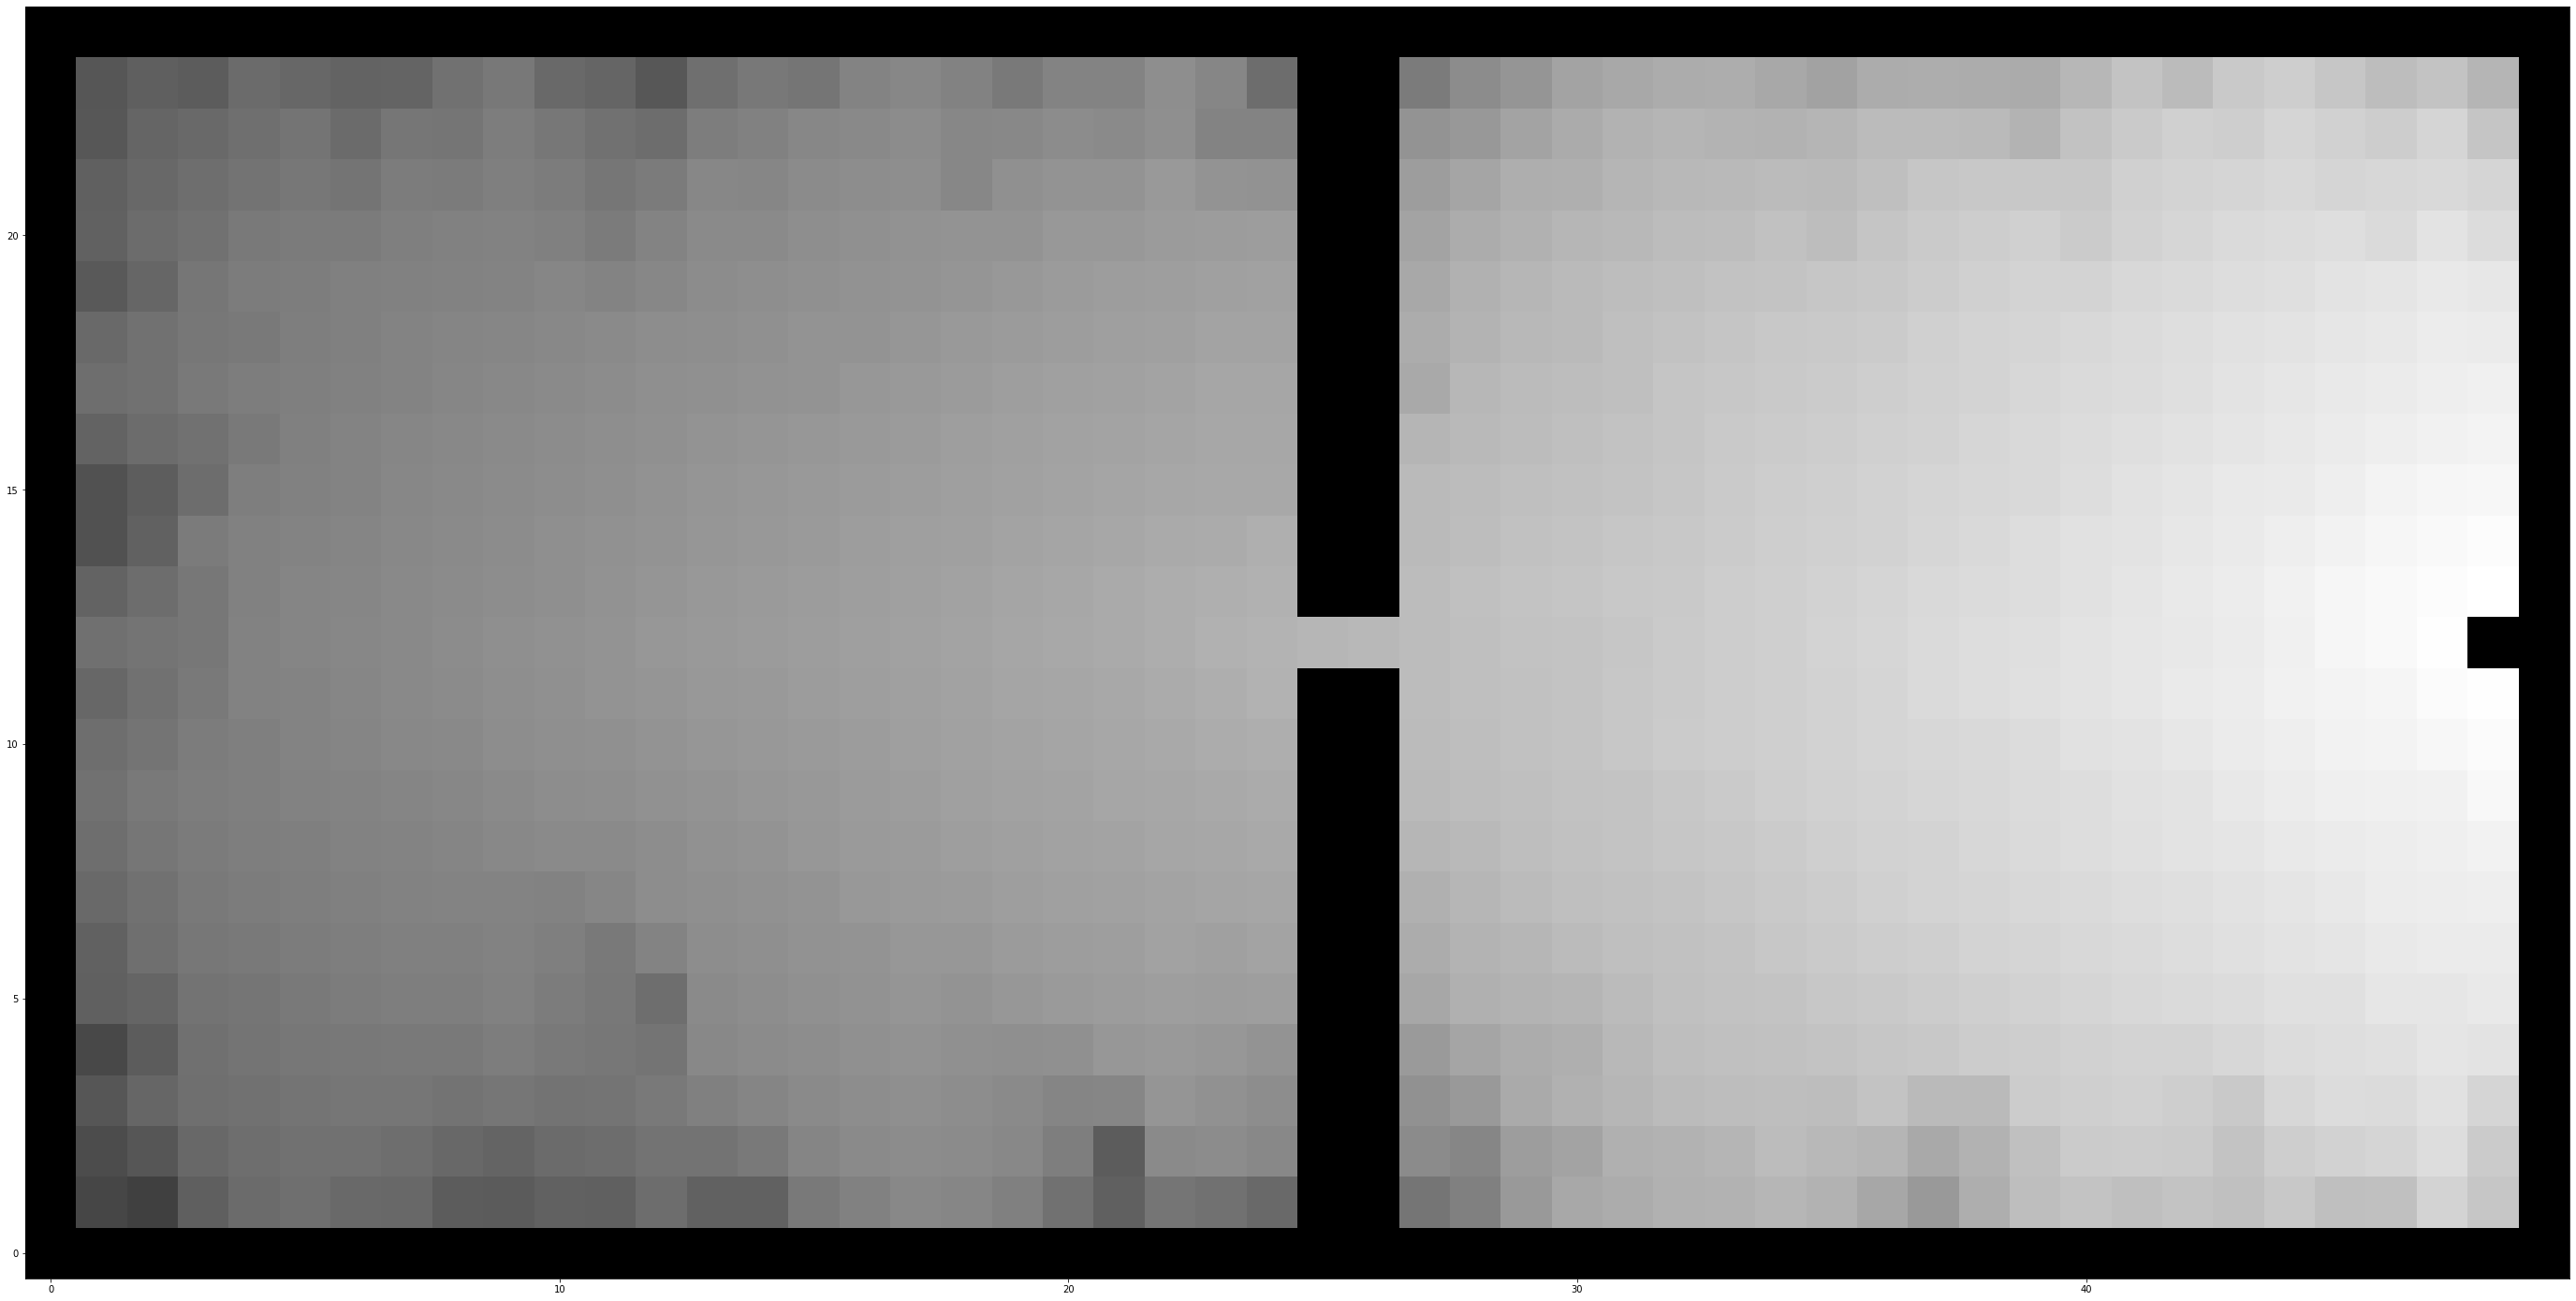

In [13]:
plt.imshow(V1.T, cmap='gray', vmin=np.amin(V1), vmax=np.amax(V1))
plt.gca().invert_yaxis()
plt.show()

In [14]:
Q2,y2 = q_learning(0.9,0.05,10000,1000,0.99,states)

In [15]:
V2,Pi2 = value_policy(Q2)

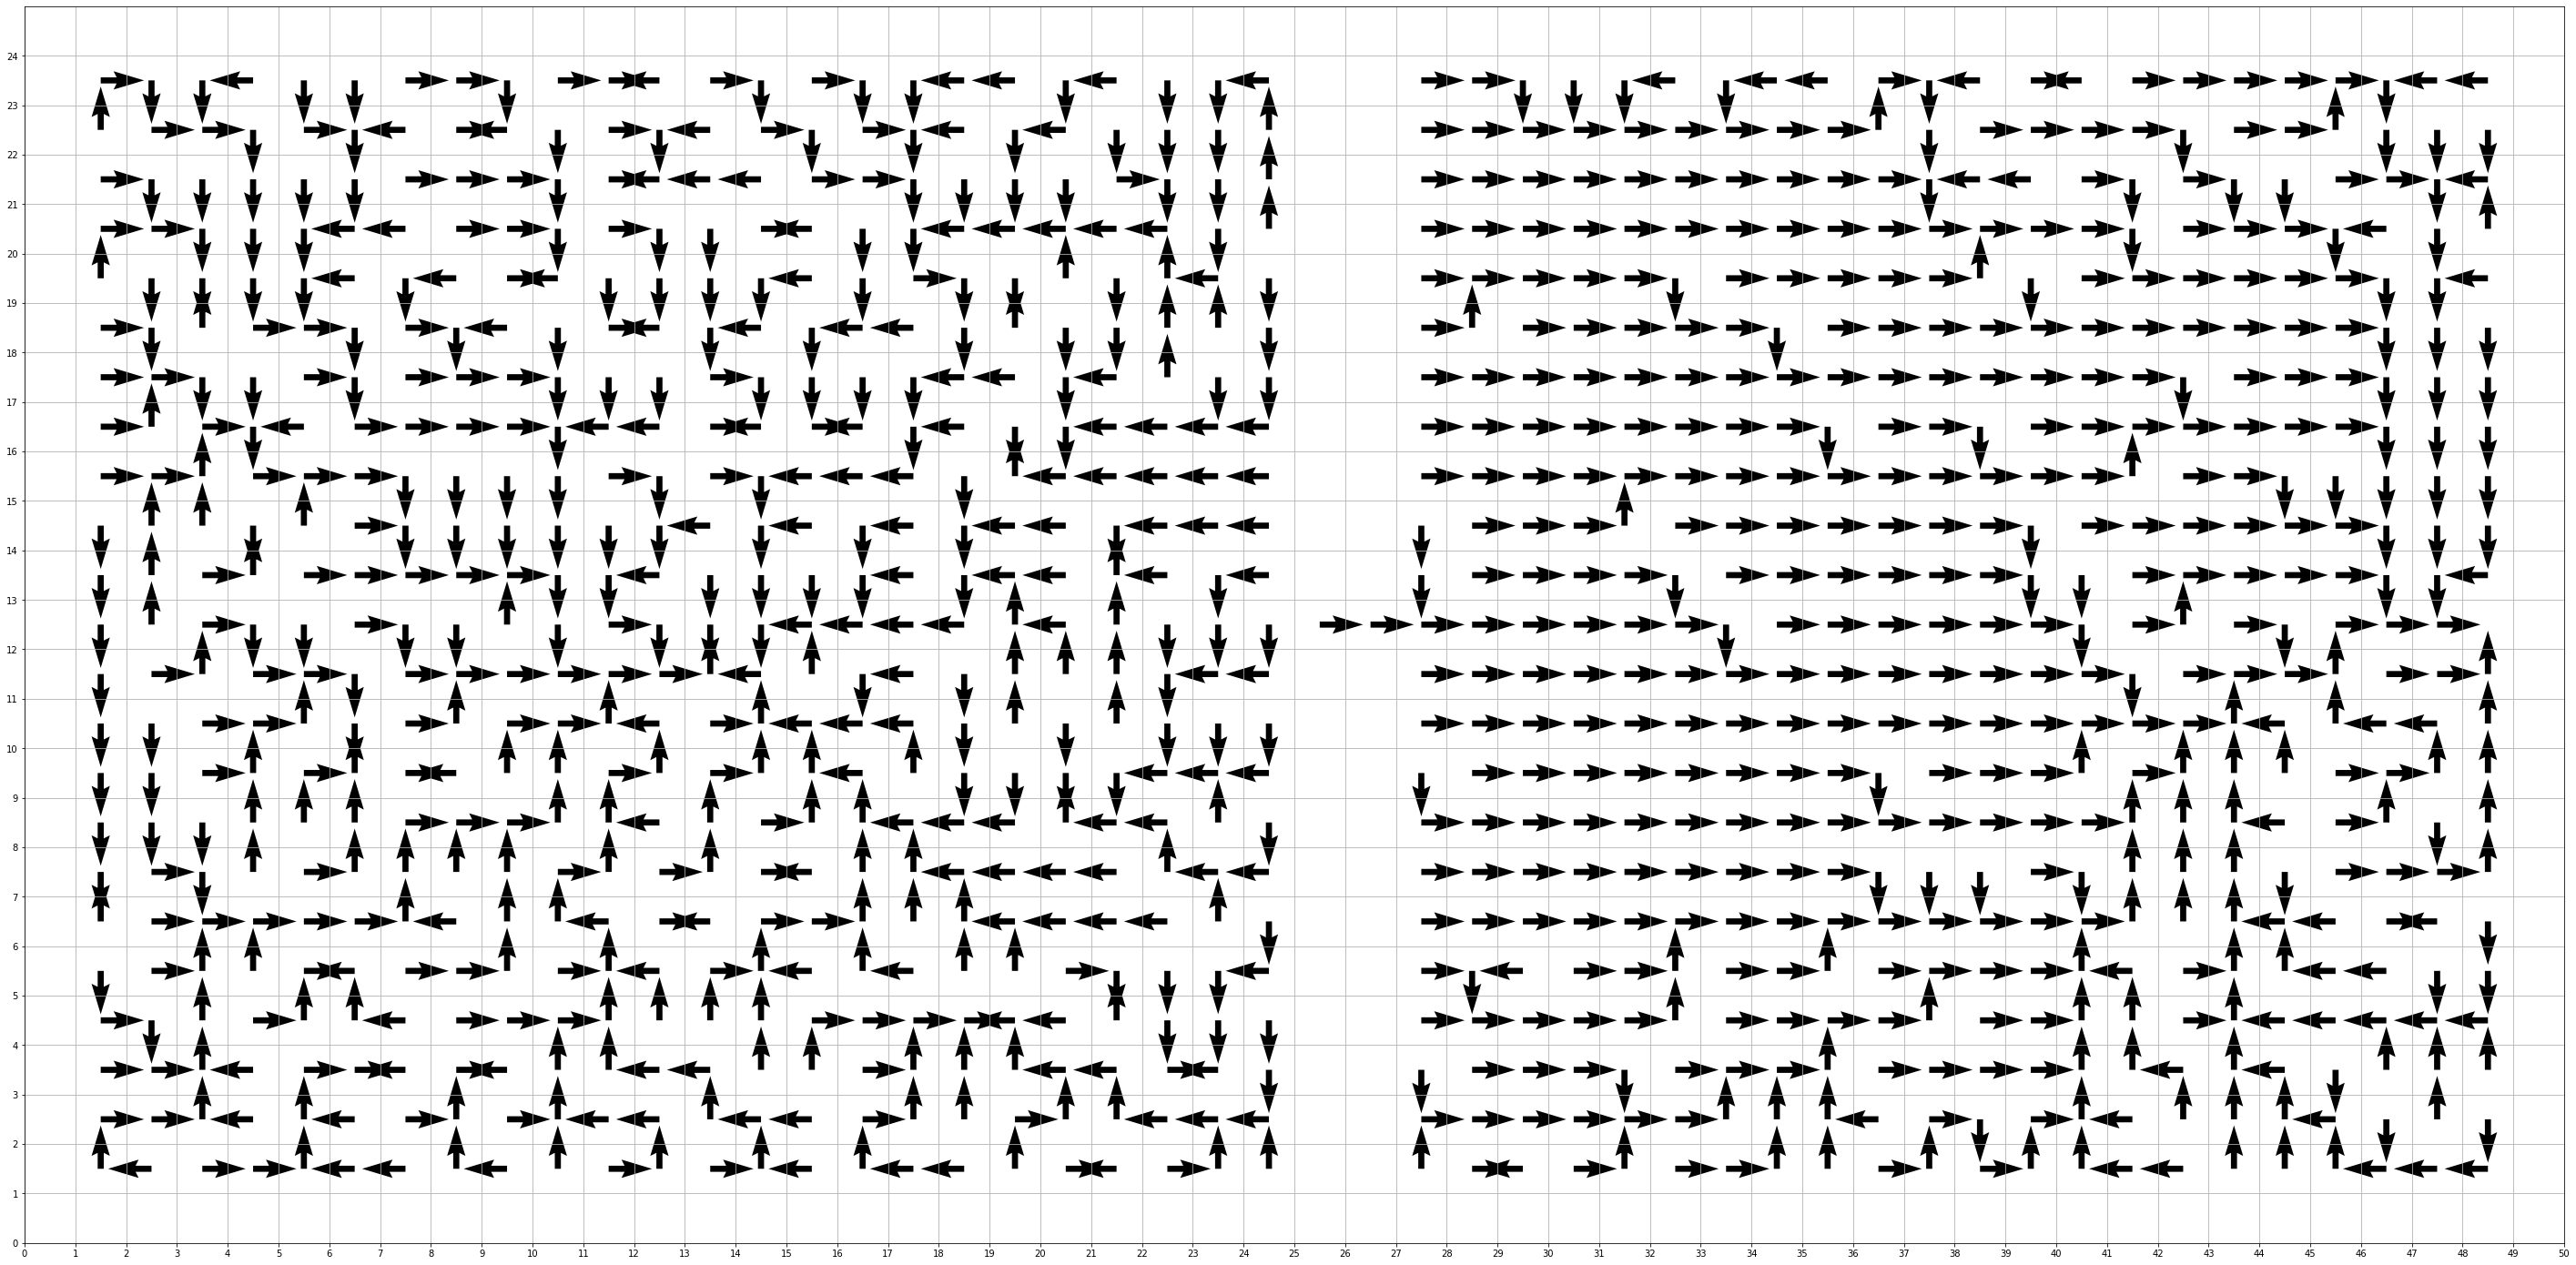

In [16]:
plot_policy(Pi2)

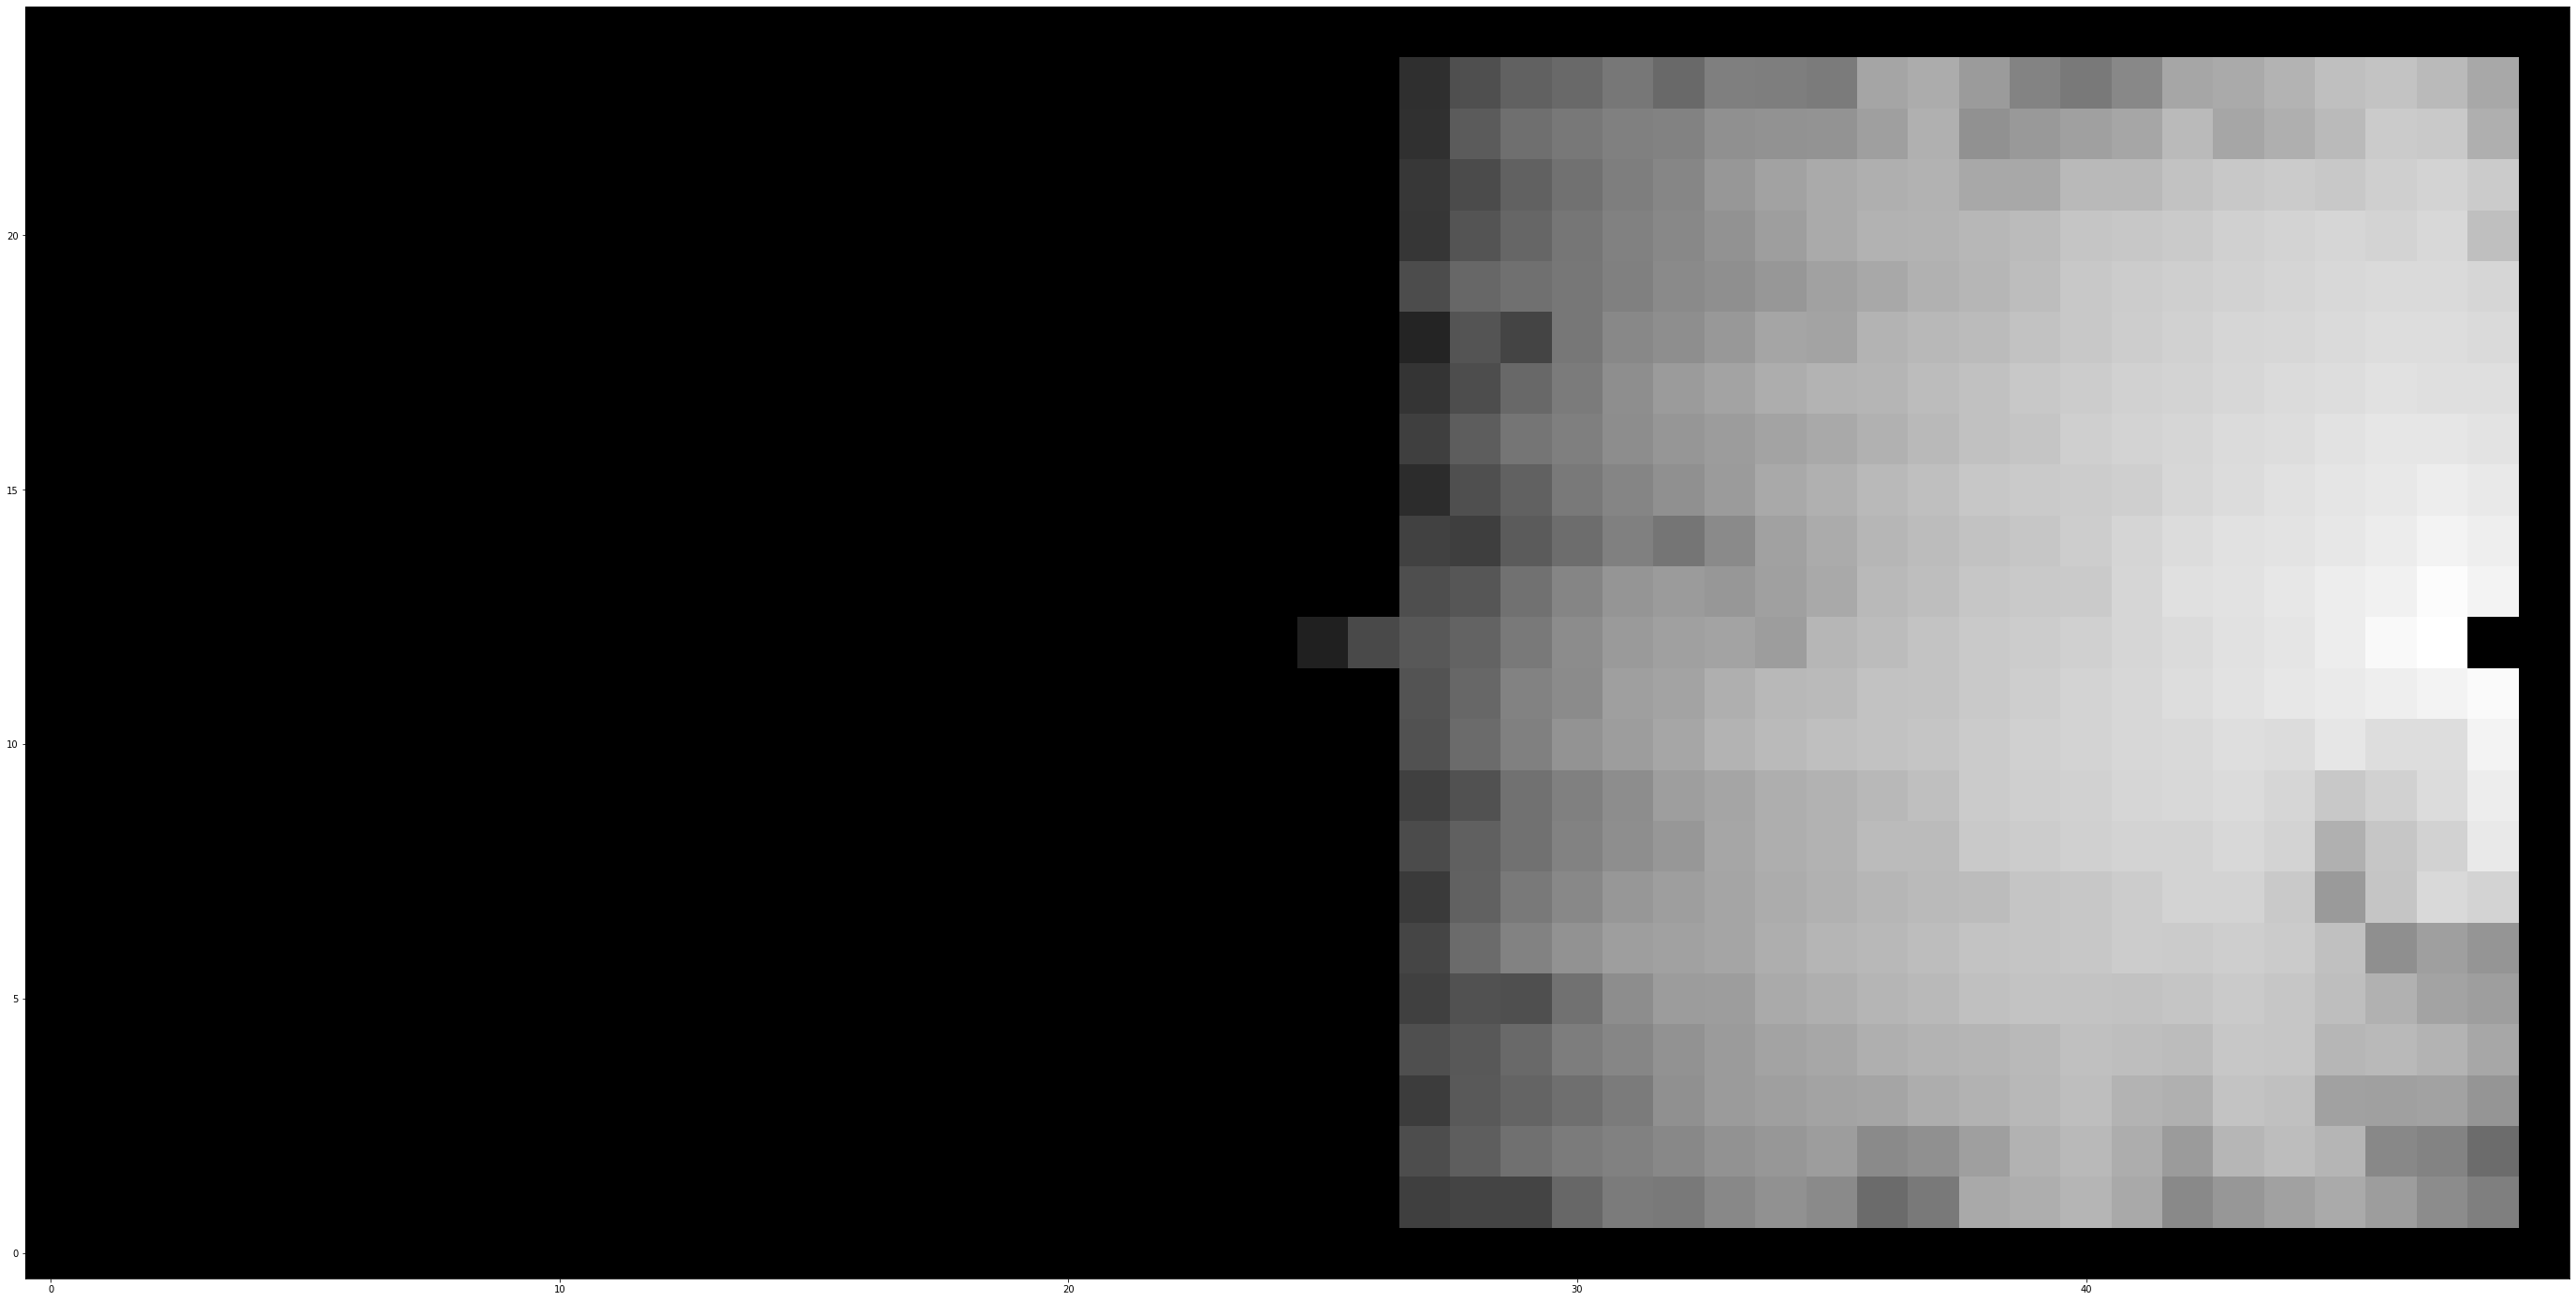

In [17]:
plt.imshow(V2.T, cmap='gray', vmin=np.amin(V2), vmax=np.amax(V2))
plt.gca().invert_yaxis()
plt.show()

In [18]:
Q3,y3 = q_learning(0.9,0.005,10000,1000,0.99,states)

In [19]:
V3,Pi3 = value_policy(Q3)

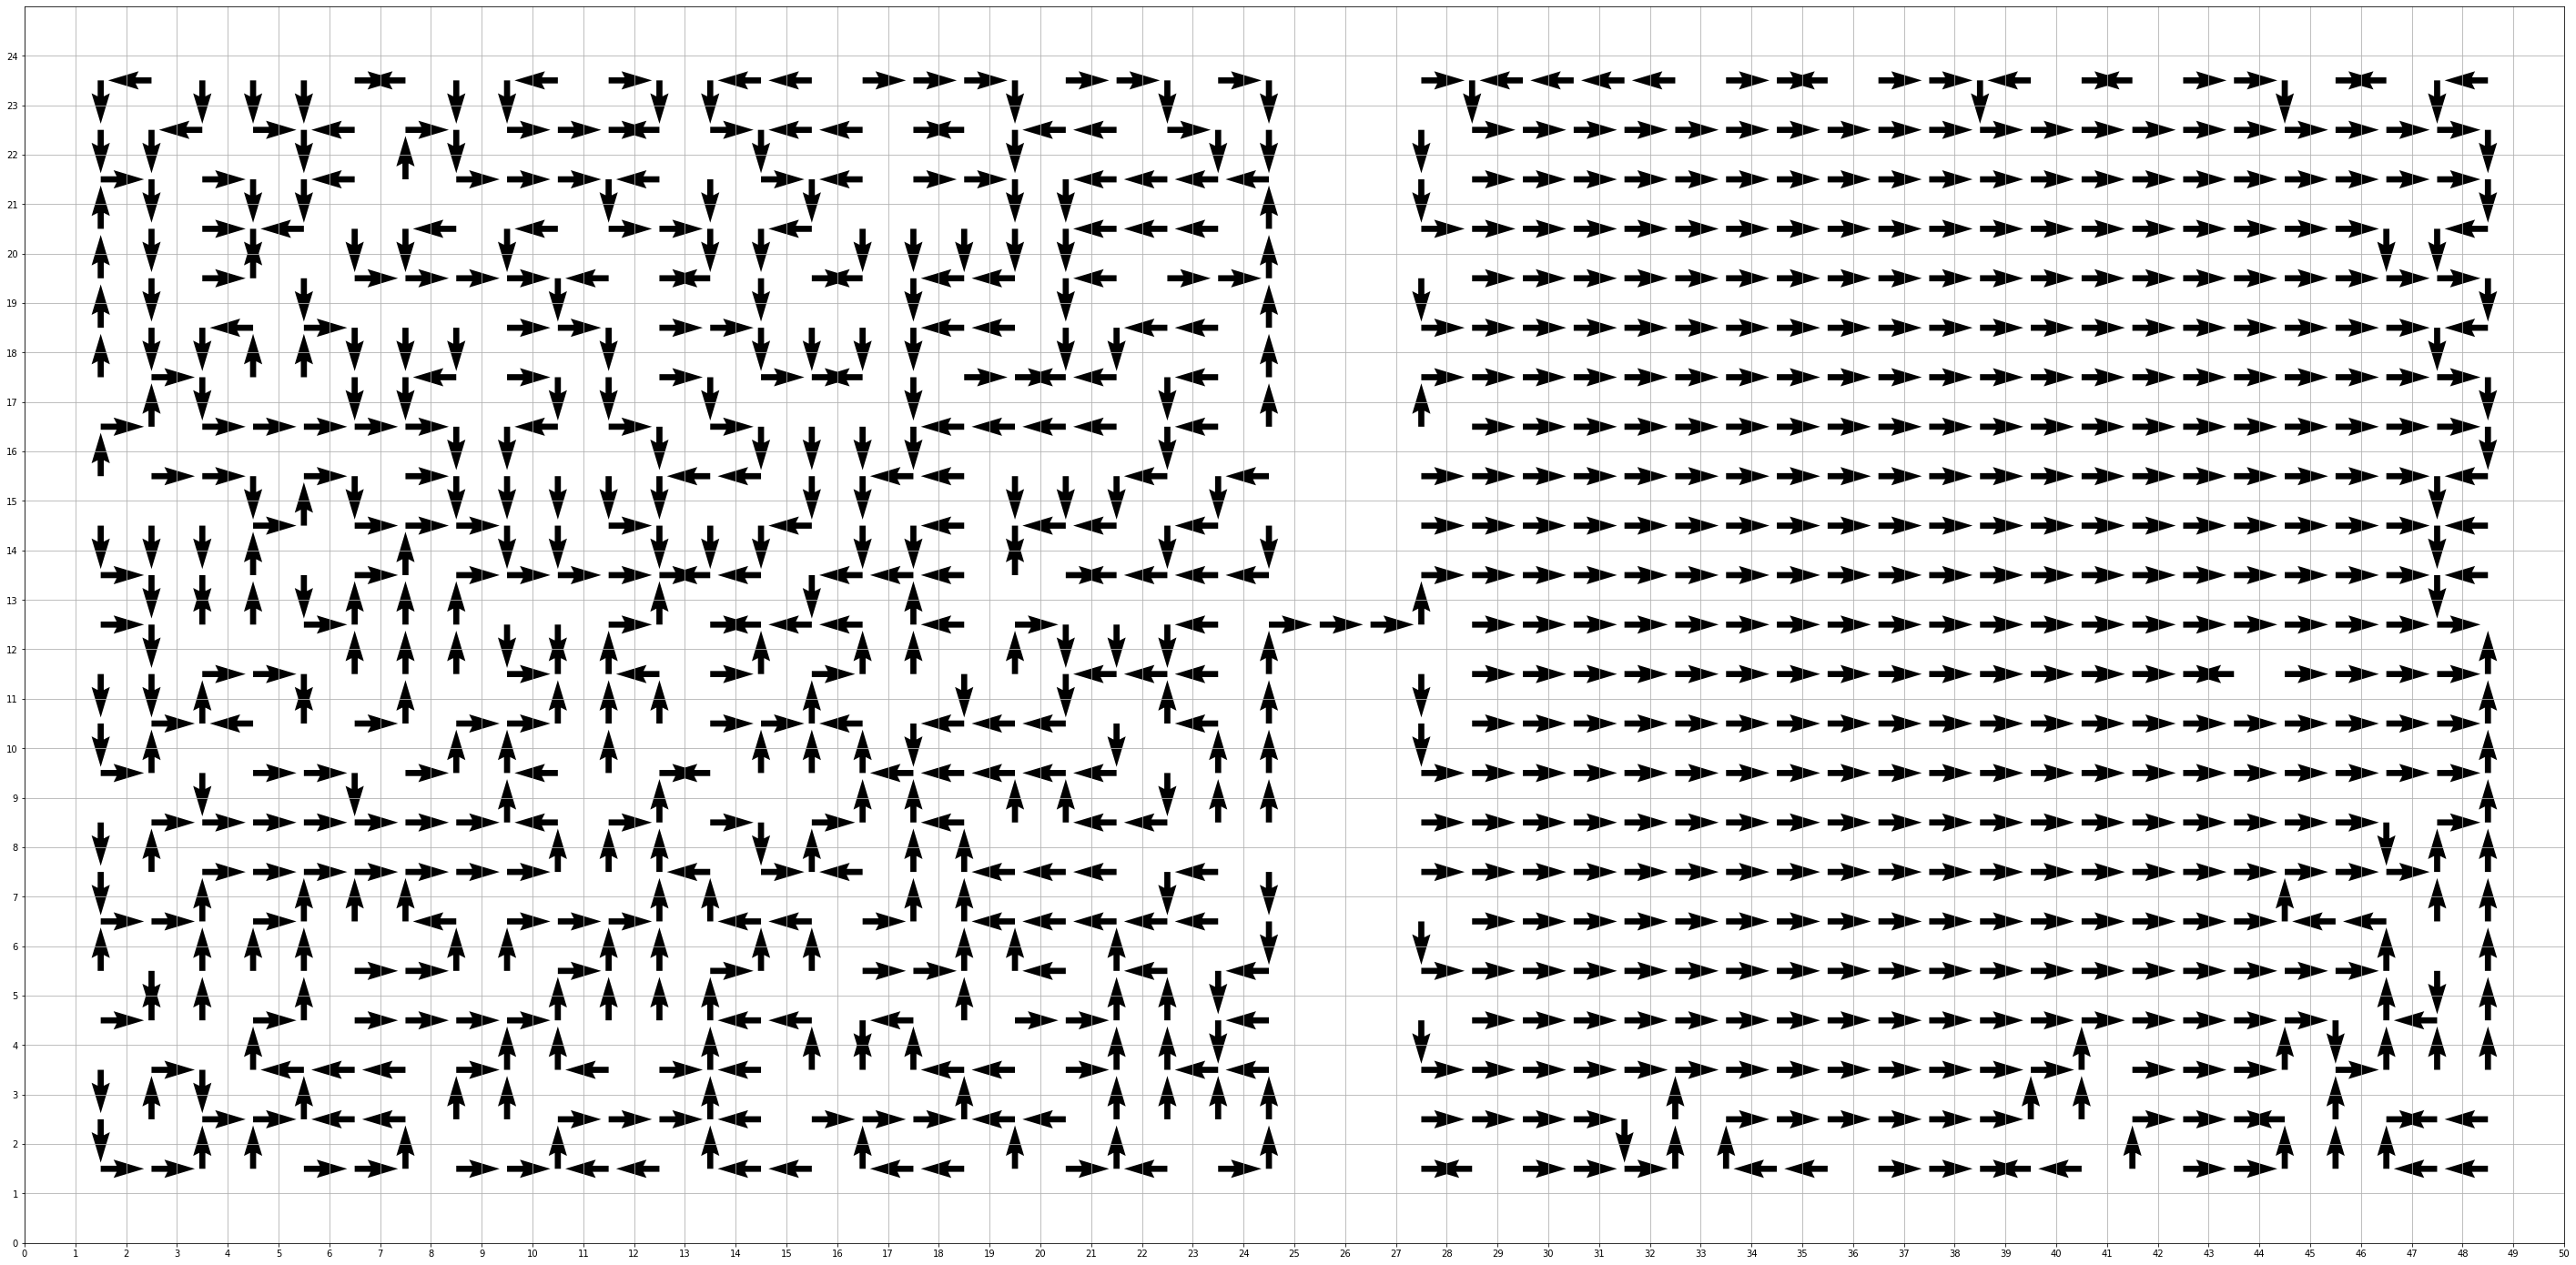

In [20]:
plot_policy(Pi3)

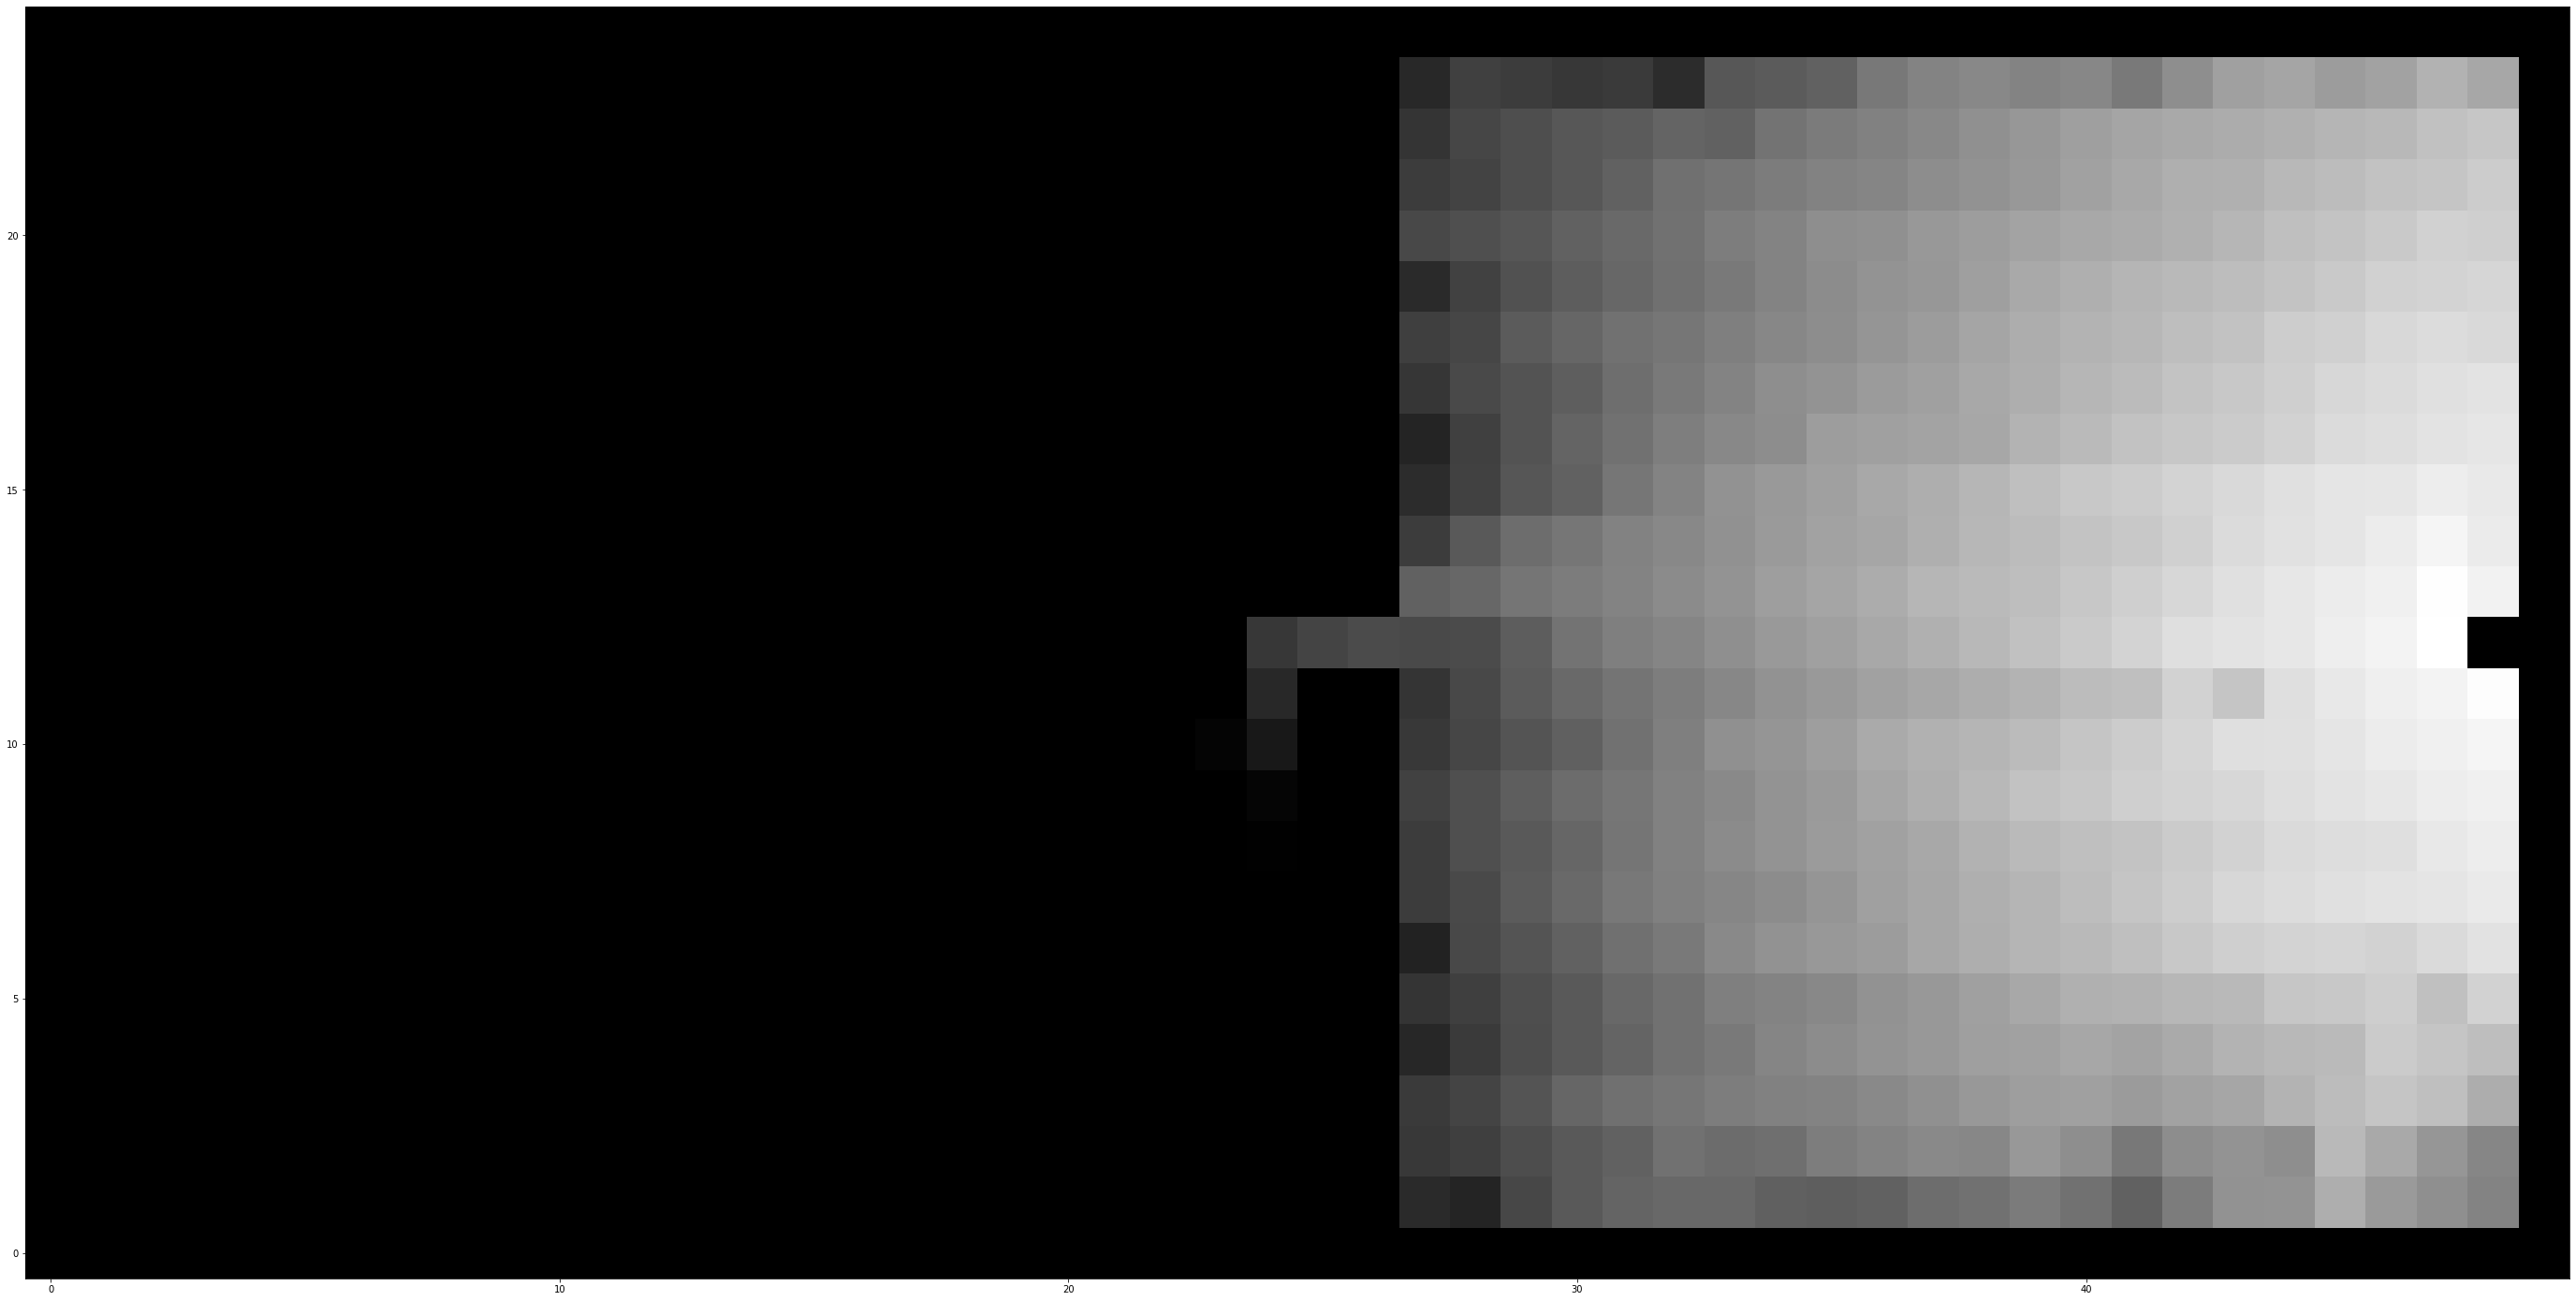

In [21]:
plt.imshow(V3.T, cmap='gray', vmin=np.amin(V3), vmax=np.amax(V3))
plt.gca().invert_yaxis()
plt.show()

In [22]:
x = np.arange(1,10001,1)

In [23]:
y1 = q_learning(0.9,0.5,10000,1000,0.99,states)[1]
y2 = q_learning(0.9,0.05,10000,1000,0.99,states)[1]


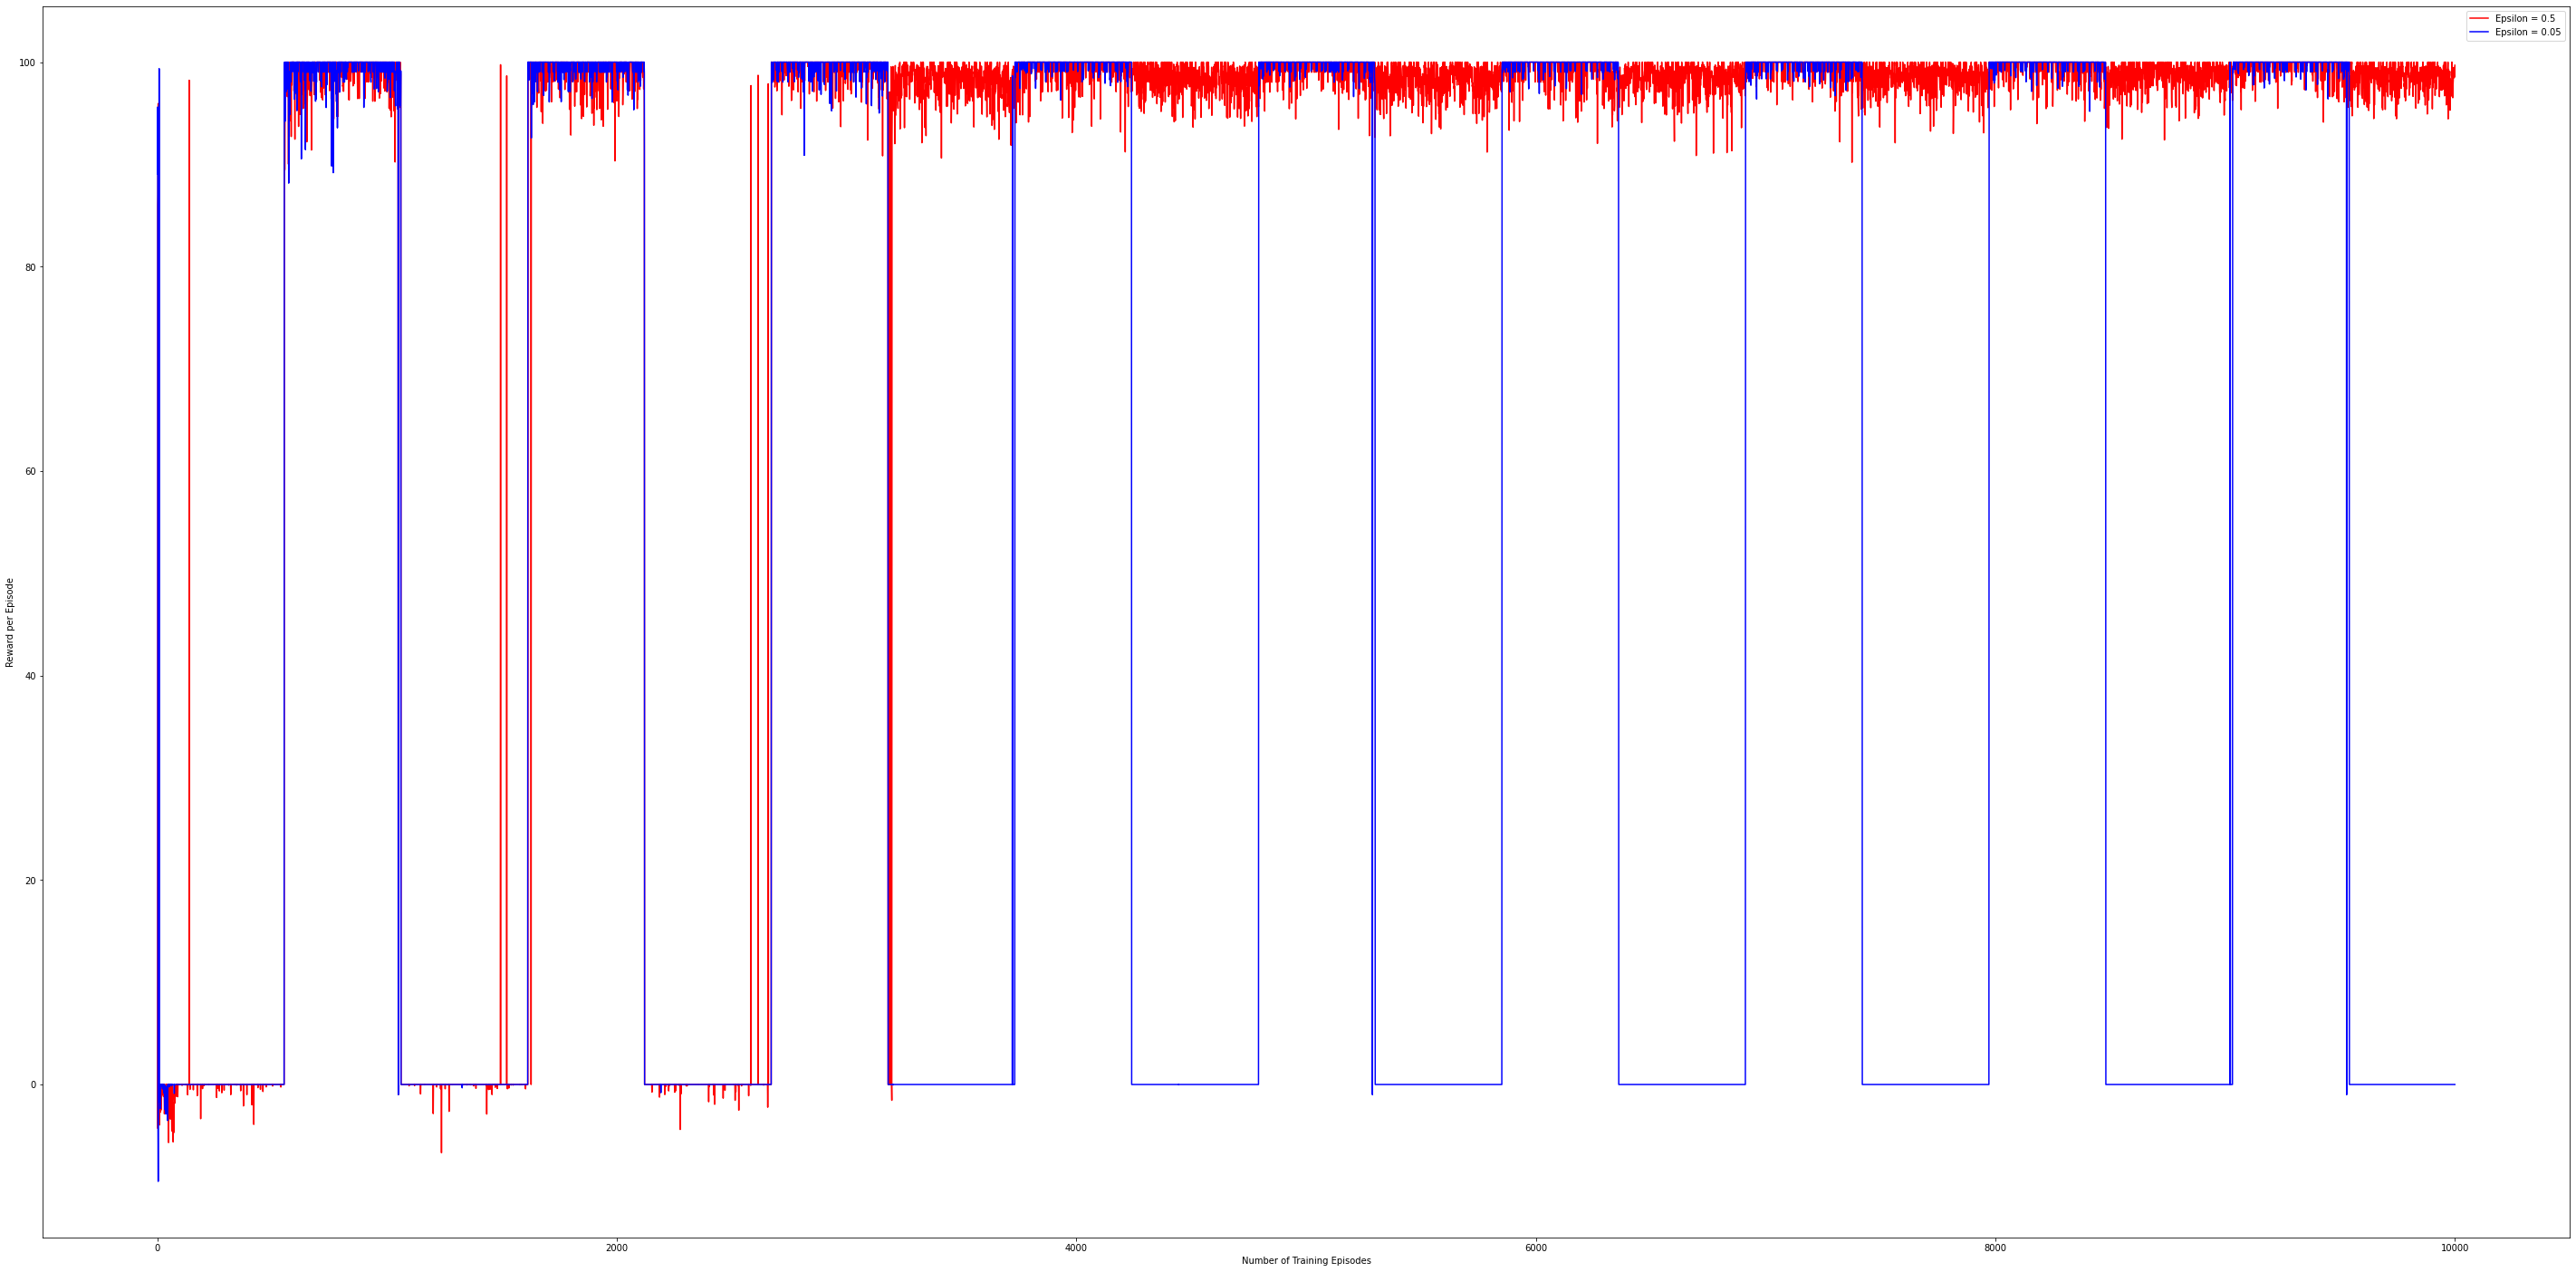

In [24]:
plt.plot(x, y1, color = 'r', label = 'Epsilon = 0.5')
plt.plot(x, y2,color = 'b', label = 'Epsilon = 0.05')
plt.xlabel('Number of Training Episodes')
plt.ylabel('Reward per Episode')
plt.rcParams["figure.figsize"] = (20,10)
plt.legend()
plt.show()